### Segment-2
#### Content

Selected topic: COVID-19
The novel coronavirus disease (COVID-19) is an infectious disease caused by SARS-CoV-2 which is a type of coronavirus discovered in 2019. Coronavirus pandemic was originated from China in December 2019, has resulted with over 604 Million cases and 6.5 Million deaths worldwide.

Reason why they selected their topic?
We selected the topic of COVID-19, because we are currently in a situtation where there are still relatively high numbers of people with COVID-19.

#### Description of their source of data:
Our dataset comes from NYC open data repository, Data Provided by Department of Health and Mental Hygiene (DOHMH).The dataset shows outcomes (confirmed cases, hospitalizations, and deaths) for cohorts defined by each date of specimen collection (specimen_date). For example, if a NYC resident tested positive for SARS-CoV-2 and was subsequently hospitalized, both events would show under the same specimen_date, indicating the date of specimen collection for the positive test and not the date of the hospitalization.The data consists of the following infromation -

- covid-testing specimens
- the extracted date of the specimen results
- the number of people tested
- the number of people who were tested positive for COVID-19
- the number of people who were hospitalized
- the number of people who passed away in the hospital due to COVID-19.

#### Questions they hope to answer with the data?
- Does the number of COVID-19 patients hospitalized correlate with the average percentage of COVID-19 patients who passed away during hospitalization?
- By analyzing the data can we predict the trend of people testing positive in NYC?
- By analyzing the data from hospitalization and death rates compared to the tested positive for COVID-19, has the virus appeared to cause a more severe effect on the community?
- Does the number of people who are tested positive for COVID-19 correlate with the number of deaths in the hospital?
- Did the time of vaccination correlate with the number of deaths in the hospital due to COVID-19?



#### Resources
##### Data Cleaning and Analysis
- Python
- Jupyter Notebook
- Matplotlib
##### Database Storage
- PostgreSQL/pgAdmin4
##### Machine Learning
- SciKitLearn - supervised machine learning models

##### Preprocessing
Cleaning is the process of detecting and removing unnecessary records from the data to ensure the future analysis will be informative and meaningful. We perform below steps to clean the original data set:

At first we import the required packages to import, investigate and plot data: pandas, numpy and matplotlib.


In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.linear_model import LinearRegression

We create a DataFrame where we'll store row and col numbers from the dataset.

In [2]:
covid_df=pd.read_csv("C:\\Users\sushm\OneDrive\Desktop\class\class\project\COVID-19.csv")
covid_df.head(10)

,extract_date,specimen_date,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths
0,04/29/2020,04/17/2020,9979,3386,527,96
1,04/29/2020,02/08/2020,1,0,0,0
2,04/29/2020,03/05/2020,63,5,3,1
3,04/29/2020,04/09/2020,9019,4803,1253,386
4,04/29/2020,04/03/2020,9389,5523,1688,582
5,04/29/2020,03/25/2020,7457,4803,1395,429
6,04/29/2020,03/21/2020,4713,2663,757,231
7,04/29/2020,03/20/2020,7756,4121,889,237
8,04/29/2020,03/14/2020,1702,684,217,59
9,04/29/2020,04/24/2020,8683,2092,230,18


In [3]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176148 entries, 0 to 176147
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   extract_date         176148 non-null  object
 1   specimen_date        176148 non-null  object
 2   Number_tested        176148 non-null  int64 
 3   Number_confirmed     176148 non-null  int64 
 4   Number_hospitalized  176148 non-null  int64 
 5   Number_deaths        176148 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 8.1+ MB


In [4]:
covid_df.shape

(176148, 6)

In [5]:
covid_df.describe()

,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths
count,176148.000000,176148.000000,176148.000000,176148.000000
mean,11141.475714,1427.914680,234.946375,73.940686
std,6413.050113,1368.222368,392.006729,160.110002
min,1.000000,0.000000,0.000000,0.000000
25%,6738.000000,371.000000,38.000000,4.000000
50%,10885.000000,1135.000000,115.000000,21.000000
75%,16448.000000,1960.000000,199.000000,44.000000
max,24727.000000,6852.000000,2016.000000,923.000000


The maximum and minimum number of hospitalization was 2016 and 0 in the dataset repectively.The maximum and minimum number of death was 923 and 0 in the dataset repectively.

In [6]:
covid_df.dtypes

extract_date           object
specimen_date          object
Number_tested           int64
Number_confirmed        int64
Number_hospitalized     int64
Number_deaths           int64
dtype: object

In [7]:
for column in covid_df.columns:
    print(f"Column{column}has{covid_df[column].isnull().sum()}null values")

Columnextract_datehas0null values
Columnspecimen_datehas0null values
ColumnNumber_testedhas0null values
ColumnNumber_confirmedhas0null values
ColumnNumber_hospitalizedhas0null values
ColumnNumber_deathshas0null values


In [8]:
covid_df.columns.to_list()

['extract_date',
 'specimen_date',
 'Number_tested',
 'Number_confirmed',
 'Number_hospitalized',
 'Number_deaths']

In [9]:
covid_df.corr()

,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths
Number_tested,1.000000,0.274652,-0.065303,-0.113066
Number_confirmed,0.274652,1.000000,0.873871,0.829920
Number_hospitalized,-0.065303,0.873871,1.000000,0.987075
Number_deaths,-0.113066,0.829920,0.987075,1.000000


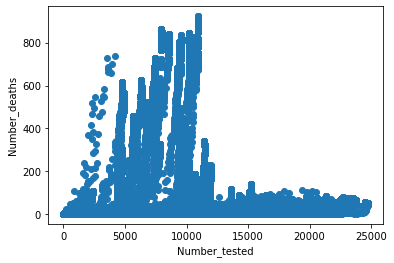

In [10]:
plt.scatter(covid_df.Number_tested, covid_df.Number_deaths)
plt.xlabel('Number_tested')
plt.ylabel('Number_deaths')
plt.show()

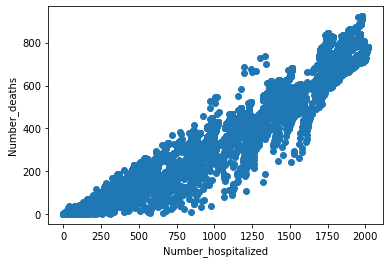

In [11]:
plt.scatter(covid_df.Number_hospitalized, covid_df.Number_deaths)
plt.xlabel('Number_hospitalized')
plt.ylabel('Number_deaths')
plt.show()

The above figure shows a positive correlation between number of hospitalized and number of deaths.Along the x-axis are the number of hospitalized from our dataset, and the y-axis are the Number_deaths.

### Exploratory Data Analysis (EDA)

#### Data wrangling for machine learning

Prepare the data for further analysis-

In [12]:
X = covid_df.Number_hospitalized.values.reshape(-1, 1)

In [13]:
y = covid_df.Number_deaths.values.reshape(-1, 1)

In [14]:
X.shape

(176148, 1)

In [15]:
y.shape

(176148, 1)

In [16]:
X[:5]

array([[ 527],
       [   0],
       [   3],
       [1253],
       [1688]], dtype=int64)

In [17]:
y[:5]

array([[ 96],
       [  0],
       [  1],
       [386],
       [582]], dtype=int64)

 Using several libraries, basic linear regressions were the initial machine learning models to gain insights.

In [18]:
model = LinearRegression()

In [19]:
model.fit(X, y)

LinearRegression()

In [20]:
y_pred = model.predict(X)
print(y_pred.shape)

(176148, 1)


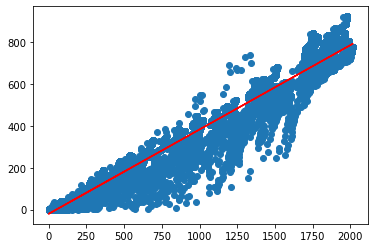

<Figure size 432x288 with 0 Axes>

In [21]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()
plt.savefig('linear regression')

Figure 3 shows the Number_hospitalized vs. the number of deaths. The correlation between the two variables appears to be very strong at best; however, the correlation is strongly positive. Therefore, we see a positive correlation between them.

The best fit line is in red, drawn through the predictions. The maximum value of Number_hospitalization in the current dataset is 2000, but the linear regression model can extrapolate beyond it. That is, if given more than 2000 count, it will be able to guess the associated deaths.


In [22]:
print(model.coef_)
print(model.intercept_)

[[0.40315794]]
[-20.77981002]


#### Logistic Regression

Logistic Regression is a an obvious, time-tested method for categorical target variable. The model seprates outcome '0' from outcome '1' by calculating a probability.

In [23]:
##Logistic Regression 
covid_df.head(10)

,extract_date,specimen_date,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths
0,04/29/2020,04/17/2020,9979,3386,527,96
1,04/29/2020,02/08/2020,1,0,0,0
2,04/29/2020,03/05/2020,63,5,3,1
3,04/29/2020,04/09/2020,9019,4803,1253,386
4,04/29/2020,04/03/2020,9389,5523,1688,582
5,04/29/2020,03/25/2020,7457,4803,1395,429
6,04/29/2020,03/21/2020,4713,2663,757,231
7,04/29/2020,03/20/2020,7756,4121,889,237
8,04/29/2020,03/14/2020,1702,684,217,59
9,04/29/2020,04/24/2020,8683,2092,230,18


In [24]:
covid_df["risk_of_death"] = covid_df["Number_deaths"] / covid_df["Number_hospitalized"]

In [25]:
covid_df.head()

,extract_date,specimen_date,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths,risk_of_death
0,04/29/2020,04/17/2020,9979,3386,527,96,0.182163
1,04/29/2020,02/08/2020,1,0,0,0,NaN
2,04/29/2020,03/05/2020,63,5,3,1,0.333333
3,04/29/2020,04/09/2020,9019,4803,1253,386,0.308061
4,04/29/2020,04/03/2020,9389,5523,1688,582,0.344787


In [26]:
new_covid_df=covid_df.dropna()

In [27]:
new_covid_df.head()

,extract_date,specimen_date,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths,risk_of_death
0,04/29/2020,04/17/2020,9979,3386,527,96,0.182163
2,04/29/2020,03/05/2020,63,5,3,1,0.333333
3,04/29/2020,04/09/2020,9019,4803,1253,386,0.308061
4,04/29/2020,04/03/2020,9389,5523,1688,582,0.344787
5,04/29/2020,03/25/2020,7457,4803,1395,429,0.307527


In [28]:
new_covid_df['death_chance']=new_covid_df['risk_of_death'].round(1)*100
new_covid_df.head(10)

C:\Users\sushm\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,extract_date,specimen_date,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths,risk_of_death,death_chance
0,04/29/2020,04/17/2020,9979,3386,527,96,0.182163,20.0
2,04/29/2020,03/05/2020,63,5,3,1,0.333333,30.0
3,04/29/2020,04/09/2020,9019,4803,1253,386,0.308061,30.0
4,04/29/2020,04/03/2020,9389,5523,1688,582,0.344787,30.0
5,04/29/2020,03/25/2020,7457,4803,1395,429,0.307527,30.0
6,04/29/2020,03/21/2020,4713,2663,757,231,0.305152,30.0
7,04/29/2020,03/20/2020,7756,4121,889,237,0.266592,30.0
8,04/29/2020,03/14/2020,1702,684,217,59,0.271889,30.0
9,04/29/2020,04/24/2020,8683,2092,230,18,0.078261,10.0
10,04/29/2020,03/08/2020,109,27,15,4,0.266667,30.0


In [29]:
#new_covid_df2=new_covid_df

In [30]:
#output_file_path = "../project/COVID_deaths_chance.csv"
#new_covid_df2.to_csv(output_file_path, index=False)

In [31]:
#death_chance_df=pd.read_csv("../project/COVID_deaths_chance.csv")
#death_chance_df.head(10)

,extract_date,specimen_date,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths,risk_of_death,death_chance
0,04/29/2020,04/17/2020,9979,3386,527,96,0.182163,20.0
1,04/29/2020,03/05/2020,63,5,3,1,0.333333,30.0
2,04/29/2020,04/09/2020,9019,4803,1253,386,0.308061,30.0
3,04/29/2020,04/03/2020,9389,5523,1688,582,0.344787,30.0
4,04/29/2020,03/25/2020,7457,4803,1395,429,0.307527,30.0
5,04/29/2020,03/21/2020,4713,2663,757,231,0.305152,30.0
6,04/29/2020,03/20/2020,7756,4121,889,237,0.266592,30.0
7,04/29/2020,03/14/2020,1702,684,217,59,0.271889,30.0
8,04/29/2020,04/24/2020,8683,2092,230,18,0.078261,10.0
9,04/29/2020,03/08/2020,109,27,15,4,0.266667,30.0


In [32]:
death_chance_df['death_probability']= death_chance=pd.cut(death_chance_df['death_chance'], 
                               bins=[0, 30, 100], 
                               labels=['0', '1'])

In [33]:
death_chance_df.head(10)

,extract_date,specimen_date,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths,risk_of_death,death_chance,death_probability
0,04/29/2020,04/17/2020,9979,3386,527,96,0.182163,20.0,0
1,04/29/2020,03/05/2020,63,5,3,1,0.333333,30.0,0
2,04/29/2020,04/09/2020,9019,4803,1253,386,0.308061,30.0,0
3,04/29/2020,04/03/2020,9389,5523,1688,582,0.344787,30.0,0
4,04/29/2020,03/25/2020,7457,4803,1395,429,0.307527,30.0,0
5,04/29/2020,03/21/2020,4713,2663,757,231,0.305152,30.0,0
6,04/29/2020,03/20/2020,7756,4121,889,237,0.266592,30.0,0
7,04/29/2020,03/14/2020,1702,684,217,59,0.271889,30.0,0
8,04/29/2020,04/24/2020,8683,2092,230,18,0.078261,10.0,0
9,04/29/2020,03/08/2020,109,27,15,4,0.266667,30.0,0


In [34]:
new_death_chance_df=death_chance_df.dropna()

In [35]:
new_death_chance_df = death_chance_df.apply (pd.to_numeric, errors='coerce')

print (new_death_chance_df)

        extract_date  specimen_date  Number_tested  Number_confirmed  \
0                NaN            NaN           9979              3386   
1                NaN            NaN             63                 5   
2                NaN            NaN           9019              4803   
3                NaN            NaN           9389              5523   
4                NaN            NaN           7457              4803   
...              ...            ...            ...               ...   
162771           NaN            NaN          21551              2483   
162772           NaN            NaN          13961              1678   
162773           NaN            NaN            401                89   
162774           NaN            NaN          14573               503   
162775           NaN            NaN          18765              1648   

        Number_hospitalized  Number_deaths  risk_of_death  death_chance  \
0                       527             96       0.182163   

In [36]:
output_file_path = "../project/COVID_deaths_chance.csv"
death_chance_df.to_csv(output_file_path, index=False)

In [37]:
death_probability_df=pd.read_csv('../project/COVID_deaths_chance.csv')
death_probability_df

,extract_date,specimen_date,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths,risk_of_death,death_chance,death_probability
0,04/29/2020,04/17/2020,9979,3386,527,96,0.182163,20.0,0.0
1,04/29/2020,03/05/2020,63,5,3,1,0.333333,30.0,0.0
2,04/29/2020,04/09/2020,9019,4803,1253,386,0.308061,30.0,0.0
3,04/29/2020,04/03/2020,9389,5523,1688,582,0.344787,30.0,0.0
4,04/29/2020,03/25/2020,7457,4803,1395,429,0.307527,30.0,0.0
...,...,...,...,...,...,...,...,...,...
162771,10/01/2021,11/18/2020,21551,2483,163,41,0.251534,30.0,0.0
162772,10/01/2021,03/17/2021,13961,1678,166,27,0.162651,20.0,0.0
162773,10/01/2021,03/09/2020,401,89,36,19,0.527778,50.0,1.0
162774,10/01/2021,09/10/2021,14573,503,38,0,0.000000,0.0,NaN


In [38]:
death_probability_df.isnull().any()

extract_date           False
specimen_date          False
Number_tested          False
Number_confirmed       False
Number_hospitalized    False
Number_deaths          False
risk_of_death          False
death_chance           False
death_probability       True
dtype: bool

In [62]:
#death_probability_df=death_probability_df.dropna()
#death_probability_df

In [40]:
#changing data type for specimen_date from object to datetime64[ns]
death_probability_df['specimen_date']=pd.to_datetime(death_probability_df['specimen_date'],infer_datetime_format=True,errors='coerce')

C:\Users\sushm\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
#changing data type for specimen_date from datetime64[ns] to  int64
death_probability_df.specimen_date=death_probability_df.specimen_date.astype('datetime64[ns]').astype(np.int64)

C:\Users\sushm\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  
C:\Users\sushm\anaconda3\envs\mlenv\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [61]:
#death_probability_df

In [43]:
death_probability_df=death_probability_df.dropna()
death_probability_df

,extract_date,specimen_date,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths,risk_of_death,death_chance,death_probability
0,04/29/2020,1587081600000000000,9979,3386,527,96,0.182163,20.0,0.0
1,04/29/2020,1583366400000000000,63,5,3,1,0.333333,30.0,0.0
2,04/29/2020,1586390400000000000,9019,4803,1253,386,0.308061,30.0,0.0
3,04/29/2020,1585872000000000000,9389,5523,1688,582,0.344787,30.0,0.0
4,04/29/2020,1585094400000000000,7457,4803,1395,429,0.307527,30.0,0.0
...,...,...,...,...,...,...,...,...,...
162770,10/01/2021,1600646400000000000,17624,1696,161,30,0.186335,20.0,0.0
162771,10/01/2021,1605657600000000000,21551,2483,163,41,0.251534,30.0,0.0
162772,10/01/2021,1615939200000000000,13961,1678,166,27,0.162651,20.0,0.0
162773,10/01/2021,1583712000000000000,401,89,36,19,0.527778,50.0,1.0


In [44]:
#death_probability_df.dtypes

extract_date            object
specimen_date            int64
Number_tested            int64
Number_confirmed         int64
Number_hospitalized      int64
Number_deaths            int64
risk_of_death          float64
death_chance           float64
death_probability      float64
dtype: object

In [45]:
#Separate the Features (X) from the Target (y)

In [46]:
y = death_probability_df["death_probability"]
X = death_probability_df.drop(columns="death_probability")

In [47]:
#Split  data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(111060, 8)

In [48]:
#Create a Logistic Regression Model
#from sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)

In [60]:
#Fit (train) or model using the training data
#classifier.fit(X_train, y_train)

In [50]:
y.value_counts()

0.0    128512
1.0     19568
Name: death_probability, dtype: int64

In [51]:
import seaborn as sns

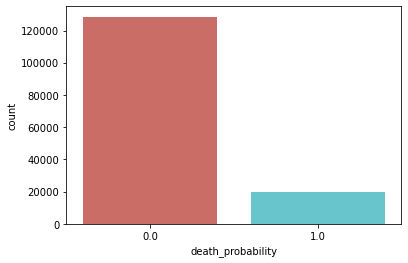

<Figure size 432x288 with 0 Axes>

In [52]:
sns.countplot(x=y,data=death_probability_df,palette='hls')
plt.show()
plt.savefig('count_plot')

<AxesSubplot:>

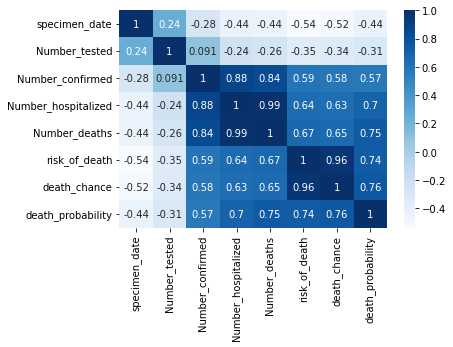

In [53]:
import seaborn as sns
sns.heatmap(death_probability_df.corr(),cmap='Blues',annot=True)

In [54]:
count_no_death = len(death_probability_df[death_probability_df['death_probability']==0])
count_no_death

128512

In [55]:
count_death = len(death_probability_df[death_probability_df['death_probability']==1])
count_death

19568

In [59]:
pct_of_no_death_prob = count_no_death/(count_no_death+count_death)
print("percentage of no death prob is", pct_of_no_death_prob*100)
pct_of_death_prob = count_death/(count_no_death+count_death)
print("percentage of death prob", pct_of_death_prob*100)

percentage of no death prob is 86.78552133981631
percentage of death prob 13.214478660183685


<AxesSubplot:xlabel='Number_hospitalized', ylabel='death_probability'>

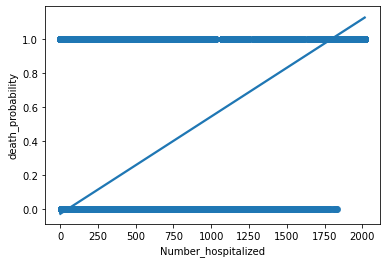

In [58]:
sns.regplot(x=death_probability_df.Number_hospitalized,y=death_probability_df.death_probability)